## 1. Problem Statement:

We have to identify large number of white and black blocks of pixels as one of the 26 capital english letters which are mentioned under "letter" column in our LetterRecognition dataset. 

## 2. Data Description

We have LetterRecognition dataset with the following description of columns:

letter :  capital letter (26 values from A to Z)

x-box :   horizontal position of box 

y-box :   vertical position of box 

width :   width of box 

high :    height of box 

onpix :   total # on pixels 

x-bar :   mean x of on pixels in box 

y-bar :   mean y of on pixels in box 

x2bar :   mean x variance 

y2bar :   mean y variance 

xybar :   mean x y correlation 

x2ybr :   mean of x * x * y 

xy2br :   mean of x * y * y 

x-ege :   mean edge count left to right 

xegvy :   correlation of x-ege with y 

y-ege :   mean edge count bottom to top 

yegvx :   correlation of y-ege with x


## 3. Data loading and analysis:

### Import the packages

In [2]:
!pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score


### Importing the dataset

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/prashant-rocks/Data-Science/master/Machine%20Learning/Classification-LetterRecognition-Dataset/src/data/LetterRecognition_train.csv')
data.head()


,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


### Data interpretation

In [3]:
data.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,4.020313,7.029063,5.117500,5.366000,3.500625,6.892688,7.512000,4.627562,5.170187,8.286625,6.471063,7.927062,3.049313,8.343937,3.682313,7.796125,8000.500000
std,1.908436,3.303998,2.003202,2.262656,2.192613,2.029576,2.333494,2.711330,2.384917,2.485706,2.641917,2.071988,2.342829,1.550055,2.571245,1.603464,4618.946489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,4000.750000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,8000.500000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,12000.250000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
letter    16000 non-null object
x-box     16000 non-null int64
y-box     16000 non-null int64
width     16000 non-null int64
high      16000 non-null int64
onpix     16000 non-null int64
x-bar     16000 non-null int64
y-bar     16000 non-null int64
x2bar     16000 non-null int64
y2bar     16000 non-null int64
xybar     16000 non-null int64
x2ybr     16000 non-null int64
xy2br     16000 non-null int64
x-ege     16000 non-null int64
xegvy     16000 non-null int64
y-ege     16000 non-null int64
yegvx     16000 non-null int64
id        16000 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.2+ MB


In [5]:
data.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
id        0
dtype: int64

In [6]:
data['letter'].value_counts()

M    648
U    646
T    644
Y    641
D    638
P    635
A    633
B    630
V    628
X    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: letter, dtype: int64

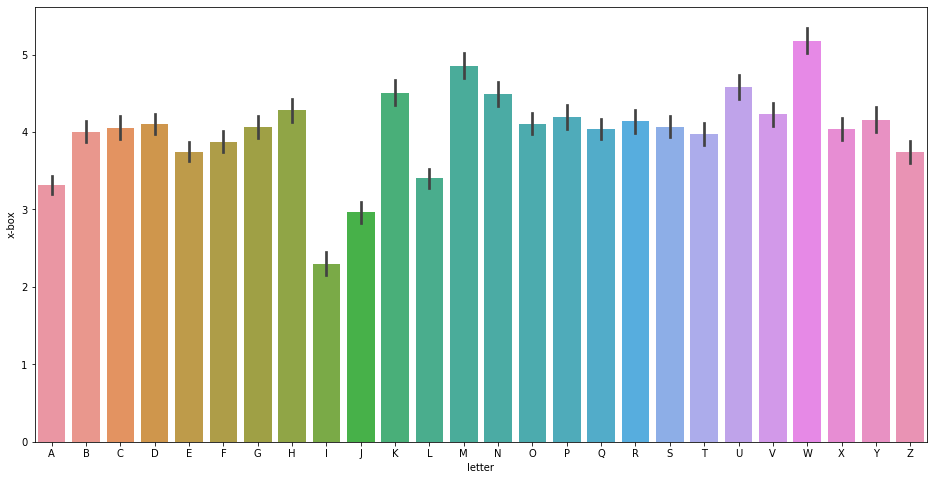

In [7]:
# basic plots: How do various attributes vary with the letters

order = list(np.sort(data['letter'].unique()))

plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='x-box', 
            data=data, 
            order=order)

#### Splitting the data into target variable and independent variables

In the X variable we store the total dataset except the 'id' column.
In the y variable we store only the target variable which is 'letter'

In [8]:
X=data.iloc[:,1:-1]
y=data.iloc[:,0]


In [9]:
X.shape,y.shape

((16000, 16), (16000,))

#### Dividing the training data and test data 

To validate how well our algorithm is predicting to the unknown test data from the 'train' dataset(20%-testdata)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


## 4. Modelling and Prediction:

#### Classification Algorithms:

1. Random Forest Classifier

In [11]:
rfc=RandomForestClassifier(n_estimators=150,criterion='entropy',random_state=0,min_samples_split=2)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [12]:
ac= accuracy_score(y_test,y_pred)
print('Accuracy is :',ac*100)

Accuracy is : 96.125



2. KNN


In [13]:
knn = KNeighborsClassifier(n_neighbors =1 ,leaf_size=100,p=30)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test) 

In [14]:
acc=accuracy_score(y_test,knn_predictions)
print('Accuracy is :',acc*100)

Accuracy is : 94.59375



3. XGBoost


In [15]:
model = XGBClassifier(learning_rate=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.69%



4. Support Vector Classifier


In [17]:
model = SVC(C=1E01,tol=0.1)
model.fit(X_train, y_train)
predicted= model.predict(X_test)

D:\DOC\Learning\anaconda_new\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.28%



#### Test Predictions
Importing the test dataset in to the dataFrame

In [20]:
df1=pd.read_csv('https://raw.githubusercontent.com/prashant-rocks/Data-Science/master/Machine%20Learning/Classification-LetterRecognition-Dataset/src/data/LetterRecognition_test.csv')

In [21]:
df1.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,6,9,8,4,3,8,7,3,4,13,5,8,6,8,0,8,16001
1,6,9,8,8,10,7,7,5,4,7,6,8,7,9,7,10,16002
2,5,6,6,4,3,7,6,2,7,7,6,9,0,9,4,8,16003
3,5,9,7,6,4,9,7,3,5,10,4,6,5,8,1,7,16004
4,5,8,8,6,6,5,8,3,6,10,8,8,4,8,4,6,16005


In [22]:
#get the relevant data to be tested
X1=df1.iloc[:,:-1]


#### 1. Random_Forest_Classifier :

--> Fitting the model on total dataset,

--> Predicting the model on test data and

--> Creating a Submission file which contains predicted values of the test data


In [23]:
rfc.fit(X,y)
y_pred=rfc.predict(X1)

In [24]:
result = pd.DataFrame(y_pred,index=df1.id,columns=['letter'])
result.to_csv('resultrfc.csv')

#### 2. Support_Vector_Classifier :

--> Fitting the model on total dataset,

--> Predicting the model on test data and

--> Creating a Submission file which contains predicted values of the test data


In [25]:
model.fit(X,y)
y_pred=model.predict(X1)


D:\DOC\Learning\anaconda_new\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
result = pd.DataFrame(y_pred,index=df1.id,columns=['letter'])
result.to_csv('resultsvm.csv')


### Observation:

Random Forest classifier and Support Vector Machine came out as most valued algorithm as this can be analyzed on the basis of accuracy score. We have tried final outcome with test data of LetterRecognition dataset and saved the output in respective files so that comparison can be done in better way.
